# Отчет по предмету "Численные методы"
### "Методы решения задач линейной алгебры" 4
**Студент:** Свистельников Илья Вадимович


**ЗАДАНИЕ 4.1**

Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде
программ, задавая в качестве входных данных шаг сетки h . С использованием
разработанного программного обеспечения решить задачу Коши для ОДУ 2-го
порядка на указанном отрезке. Оценить погрешность численного решения с
использованием метода Рунге – Ромберга и путем сравнения с точным решением.

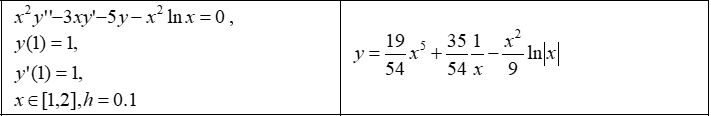

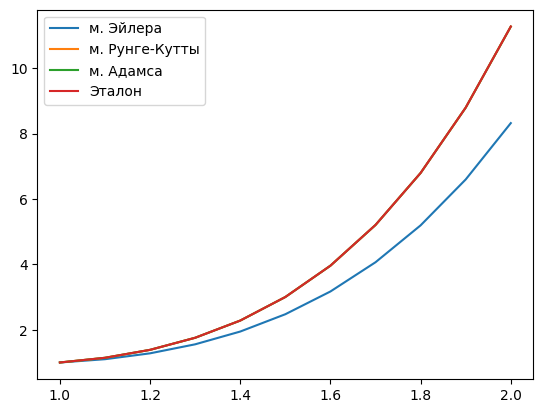

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1
x1, y1, z1 = 1, 1, 1
x2=2

def etalon(x):
    return x**5*19/54 + 35/(54*x) - x**2/9*np.log(np.abs(x))

def f(x, y, z):
    return (3*x*z + 5*y + x**2*np.log(x))/x**2

def euler_method(h, x0, x1, y0, z0):
    n=int((x1-x0)/h)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    y[0] = y0
    z[0] = z0

    for i in range(n):
        y[i+1] = y[i] + h*z[i]
        z[i+1] = z[i] + h*f(x0 + i*h, y[i], z[i])

    return y

def runge_kutta_method(h, x0, x1, y0, z0):
    n=int((x1-x0)/h)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    y[0] = y0
    z[0] = z0

    for i in range(n):
        k1 = h*z[i]
        l1 = h*f(x0 + i*h, y[i], z[i])
        k2 = h*(z[i] + 0.5*l1)
        l2 = h*f(x0 + i*h + 0.5*h, y[i] + 0.5*k1, z[i] + 0.5*l1)
        k3 = h*(z[i] + 0.5*l2)
        l3 = h*f(x0 + i*h + 0.5*h, y[i] + 0.5*k2, z[i] + 0.5*l2)
        k4 = h*(z[i] + l3)
        l4 = h*f(x0 + i*h + h, y[i] + k3, z[i] + l3)

        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        z[i+1] = z[i] + (l1 + 2*l2 + 2*l3 + l4)/6
    return y

def adams_method(h, x0, x1, y0, z0):
    n=int((x1-x0)/h)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    y[0] = y0
    z[0] = z0

    # Используем метод Рунге-Кутты для первых 4-х шагов
    for i in range(5):
        k1 = h*z[i]
        l1 = h*f(x0 + i*h, y[i], z[i])
        k2 = h*(z[i] + 0.5*l1)
        l2 = h*f(x0 + i*h + 0.5*h, y[i] + 0.5*k1, z[i] + 0.5*l1)
        k3 = h*(z[i] + 0.5*l2)
        l3 = h*f(x0 + i*h + 0.5*h, y[i] + 0.5*k2, z[i] + 0.5*l2)
        k4 = h*(z[i] + l3)
        l4 = h*f(x0 + i*h + h, y[i] + k3, z[i] + l3)

        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        z[i+1] = z[i] + (l1 + 2*l2 + 2*l3 + l4)/6

    for i in range(4, n+1):
        y[i] = y[i-1] + h/24 * (55*z[i-1] - 59*z[i-2] + 37*z[i-3] - 9*z[i-4])

        z[i] = z[i-1] + h/24 * (
            55*f(x0 + (i-1)*h, y[i-1], z[i-1]) -
            59*f(x0 + (i-2)*h, y[i-2], z[i-2]) +
            37*f(x0 + (i-3)*h, y[i-3], z[i-3]) -
            9*f(x0 + (i-4)*h, y[i-4], z[i-4]))
    return y

results_euler = euler_method(h, x1, x2, y1, z1)
results_rk = runge_kutta_method(h, x1, x2, y1, z1)
results_adams = adams_method(h, x1, x2, y1, z1)

plt.plot(np.arange(x1,x2+h,h),results_euler,label='м. Эйлера')
plt.plot(np.arange(x1,x2+h,h),results_rk,label='м. Рунге-Кутты')
plt.plot(np.arange(x1,x2+h,h),results_adams,label='м. Адамса')
plt.plot(np.arange(x1,x2+h,h),etalon(np.arange(x1,x2+h,h)),label='Эталон')
plt.legend()

In [ ]:
def runge_romberg_error(h1, y1, h2, y2, p):
    res = np.zeros(len(y1))
    for i in range(len(y1)):
        res[i] = (y1[i]-y2[i*2]) / ((h2/h1)**p -1 )
    return res

x=np.arange(x1,x2+h,h)

h_2=h/2
x=np.arange(x1,x2+h_2,h_2)
integral_h=euler_method(h, x1, x2, y1, z1)
integral_h_2=euler_method(h_2, x1, x2, y1, z1)
print(f"Погрешность методом Рунге-Роберта для метода Эйлера:\n {runge_romberg_error(h,integral_h,h_2,integral_h_2,4)[-4]}")
print(f"Погрешность от точного значения для метода Эйлера:\n {np.abs(integral_h_2-etalon(x))[-4]}")


integral_h=runge_kutta_method(h, x1, x2, y1, z1)
integral_h_2=runge_kutta_method(h_2, x1, x2, y1, z1)
print(f"\nПогрешность методом Рунге-Роберта для метода Рунге-Кутта:\n {runge_romberg_error(h,integral_h,h_2,integral_h_2,4)[-4]}")
print(f"Погрешность от точного значения для метода Рунге-Кутта:\n {np.abs(integral_h_2-etalon(x))[-4]}")

integral_h=adams_method(h, x1, x2, y1, z1)
integral_h_2=adams_method(h_2, x1, x2, y1, z1)
print(f"\nПогрешность методом Рунге-Роберта для метода Адамса:\n {runge_romberg_error(h,integral_h,h_2,integral_h_2,4)[-4]}")
print(f"Погрешность от точного значения для метода Адамса:\n {np.abs(integral_h_2-etalon(x))[-4]}")

Погрешность методом Рунге-Роберта для метода Эйлера:
 0.524734185958988
Погрешность от точного значения для метода Эйлера:
 1.0770986861310528

Погрешность методом Рунге-Роберта для метода Рунге-Кутта:
 0.0007663033400556666
Погрешность от точного значения для метода Рунге-Кутта:
 9.073559738403958e-05

Погрешность методом Рунге-Роберта для метода Адамса:
 0.0012716504266004828
Погрешность от точного значения для метода Адамса:
 0.00021252530522186674


### Вывод по заданию 4.1

Были реализованы методы Эйлера, Рунге-Кутта и Адама 4го порядка. Решено ОДУ и отображено на графике в различных методах. Произведена оценка погрешности методом Рунге-Ромберга и с точным значением из условия. Самым точным оказался метод Рунге-Кутта 4го порядка.

**ЗАДАНИЕ 4.2**

Реализовать метод стрельбы и конечно-разностный метод решения краевой
задачи для ОДУ в виде программ. С использованием разработанного программного
обеспечения решить краевую задачу для обыкновенного дифференциального
уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного
решения с использованием метода Рунге – Ромберга и путем сравнения с точным
решением.

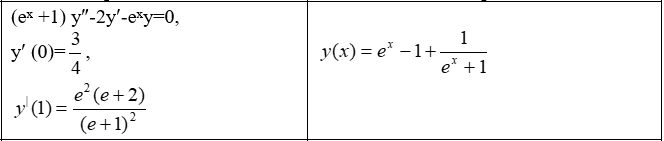

In [ ]:
import numpy as np

def f(x,y,z):
  return z,(2*z+np.exp(x)*y)/(np.exp(x)+1)


def etalon(x):
  return np.exp(x) - 1 + 1 / (np.exp(x) + 1)

In [ ]:
def runge_kutta_method(h, x0, x1, y0, z0):
    n=int((x1-x0)/h)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    x=np.arange(x0,x1,h)
    y[0] = y0
    z[0] = z0

    for i in range(n):
        k1 = h*z[i]
        l1 = h*f(x0 + i*h, y[i], z[i])[1]
        k2 = h*(z[i] + 0.5*l1)
        l2 = h*f(x0 + i*h + 0.5*h, y[i] + 0.5*k1, z[i] + 0.5*l1)[1]
        k3 = h*(z[i] + 0.5*l2)
        l3 = h*f(x0 + i*h + 0.5*h, y[i] + 0.5*k2, z[i] + 0.5*l2)[1]
        k4 = h*(z[i] + l3)
        l4 = h*f(x0 + i*h + h, y[i] + k3, z[i] + l3)[1]

        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        z[i+1] = z[i] + (l1 + 2*l2 + 2*l3 + l4)/6
    return x,y,z

def shooting_method(a, b, y0, y1,h):
    nu1 = 1.0
    nu2 = 0.8
    f1 = (runge_kutta_method(h,a,b,y0,nu1)[1][-1]) - y1
    f2 = (runge_kutta_method(h,a,b,y0,nu2)[1][-1]) - y1

    e=1e-14
    while(abs(f2) > e):
        nu1, nu2 = nu2, nu2 - f2 * (nu2 - nu1) / (f2 - f1)
        f1, f2 = f2, runge_kutta_method(h,a,b,y0,nu2)[1][-1] - y1
    return runge_kutta_method(h,a,b,y0,nu2)

In [ ]:
def p(x):
    return (-2)/(np.exp(x)+1)

def q(x):
    return (-np.exp(x))/(np.exp(x)+1)

In [ ]:
def difference_metod(p ,q ,a ,b ,y0 ,y1 ,h):
  n=int((b - a) / h)+1
  x=[a+ i * h for i in range(n)]
  A=[]
  B=[]
  C=[]
  D=[]
  A.append(0)
  B.append(-2 + (h**2) * q(a))
  C.append(1 + h * p(a)/2)
  D.append(-(1 - h * p(a)/2) * y0)
  for i in range(2,n - 1):
    A.append(1 - h * p(a + h * i) / 2)
    B.append(-2 + (h**2) * q(a + h * i))
    C.append(1 + h * p(a + h * i) / 2)
    D.append(0)
  A.append(1 - h * p(b) / 2)
  B.append(-2 + (h**2) * q(b))
  C.append(0)
  D.append(-(1 + h * p(b) / 2) * y1)

  n=len(D)
  P=np.zeros(n)
  Q=np.zeros(n)
  X=np.zeros(n)
  for i in range(n):
    P[i]=-C[i]/(B[i]+A[i]*P[i-1])
    Q[i]=(D[i]-A[i]*Q[i-1])/(B[i]+A[i]*P[i-1])
  X[n-1]=Q[n-1]
  for i in range(n-1)[::-1]:
    X[i]=X[i+1]*P[i]+Q[i]
  ans = X
  ans = np.append(ans,y1)
  return x,ans

def runge_romberg_error(h1, y1, h2, y2, p):
  res = np.zeros(len(y1))
  for i in range(len(y1)):
    res[i] = (y1[i]-y2[i*2]) / ((h2/h1)**p -1 )
  return res


In [ ]:
a = 3/4
b = 7/6
y0 = etalon(a)
y1 = etalon(b)
h1 = 0.01
h2=h1/2


x_shoot_h1,y_shoot_h1,_= shooting_method(a, b, y0, y1,h1)
x_diff_h1,y_diff_h1= difference_metod(p,q,a, b, y0, y1,h1)

x_shoot_h2,y_shoot_h2,_= shooting_method(a, b, y0, y1,h2)
x_diff_h2,y_diff_h2= difference_metod(p,q,a, b, y0, y1,h2)

In [ ]:
print("Погрешность Рунге-Ромберга")
print(f'для метода стрельбы:\n {np.abs(runge_romberg_error(h1,y_shoot_h1,h2,y_shoot_h2,4)[-4])}')
print(f'для конечно-разностного метода: \n {np.abs(runge_romberg_error(h1,y_diff_h1,h2,y_diff_h2,4)[-4])}')

Погрешность Рунге-Ромберга
для метода стрельбы:
 0.014813789014087793
для конечно-разностного метода: 
 0.015509174279157871


Погрешность от точного значения
для метода стрельбы:
 0.004836196488805289
для конечно-разностного метода:
 0.005215400774266854


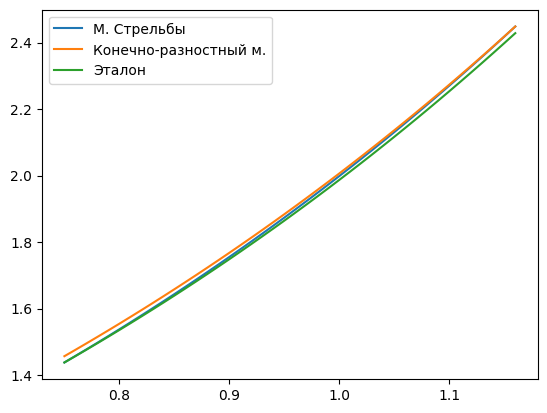

In [ ]:
import matplotlib.pyplot as plt

print("Погрешность от точного значения")
print(f'для метода стрельбы:\n {np.abs(y_shoot_h2-etalon(x_shoot_h2))[-4]}')
print(f'для конечно-разностного метода:\n {np.abs(y_diff_h2-etalon(x_diff_h2))[-4]}')
plt.plot(x_shoot_h1,y_shoot_h1,label='М. Стрельбы')
plt.plot(x_diff_h1,y_diff_h1,label='Конечно-разностный м.')
plt.plot(x_diff_h1,etalon(x_diff_h1),label='Эталон')
plt.legend()

### Вывод по заданию 4.2

Были реализованы методы стрельбы и конечно-разностный метод решения краевой задачи для ОДУ